# Loading Basic Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2

# Load Dataset

In [97]:
def load_dataset(filename, train_or_test):
    df = pd.read_csv(filename)
#     df = df.set_index('PassengerId')
    if(train_or_test):
        df['Transported'] = df['Transported'].astype(int)
        X = df.drop(['Transported'],axis=1)
        y = df['Transported']
        return X, y
    else:
        return df

In [98]:
X, y = load_dataset('../data/data_train.csv', 1)

In [115]:
X.columns

Index(['PassengerId', 'CryoSleep', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Total_expences', 'Expenditure',
       'No_spending', 'Solo', 'Cabin_num_group_1', 'Cabin_num_group_2',
       'Cabin_num_group_3', 'Family', 'HomePlanet_1', 'HomePlanet_2',
       'Destination_1', 'Destination_2', 'Age_group_1', 'Age_group_2',
       'Age_group_3', 'Cabin_deck_1', 'Cabin_deck_2', 'Cabin_deck_3',
       'Cabin_deck_4', 'Cabin_deck_5', 'Cabin_deck_6', 'Group_size_1',
       'Group_size_2', 'Group_size_3', 'Group_size_4', 'Group_size_5',
       'Group_size_6', 'Group_size_7', 'Cabin_side_1'],
      dtype='object')

In [113]:
X_to_cluster = X.iloc[:,3].values

# KMeans Clustering

In [114]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_to_cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[  0. 109.  43. ...   0.   0. 126.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [109]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_to_cluster)

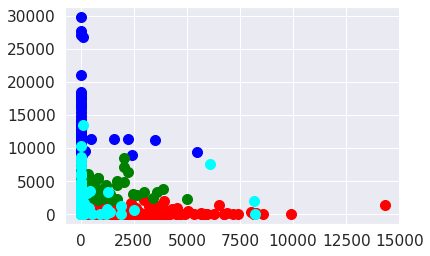

In [112]:
plt.scatter(X_to_cluster[y_kmeans == 0, 0], X_to_cluster[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_to_cluster[y_kmeans == 1, 0], X_to_cluster[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_to_cluster[y_kmeans == 2, 0], X_to_cluster[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_to_cluster[y_kmeans == 3, 0], X_to_cluster[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

# Split data

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)